### Autovalores

In [86]:
import numpy as np
import scipy

In [87]:
from sympy.abc import A, B, C, D, x, y
from sympy import Matrix

matrix = Matrix([A*x + B*y, C*x+B*y])
J = matrix.jacobian([x,y])
J

Matrix([
[A, B],
[C, B]])

In [88]:
from sympy import MatrixSymbol, Trace

Trace(J).simplify()

A + B

In [89]:
J.det()

A*B - B*C

In [90]:
from sympy import sympify

J.charpoly()

PurePoly(lambda**2 + (-A - B)*lambda + A*B - B*C, lambda, domain='ZZ[A,B,C]')

EDO Cúbica Unidimensional

$ \dfrac{dx}{dt} = rx - x^3 $

In [91]:
# Modelando a equação em Sympy
from sympy.abc import r, x
from sympy.solvers import solve
from sympy import sympify

# Alterando o valor de r obtemos a solução
r = 2
eq = r*x - x**3
solve(eq)

[0, -sqrt(2), sqrt(2)]

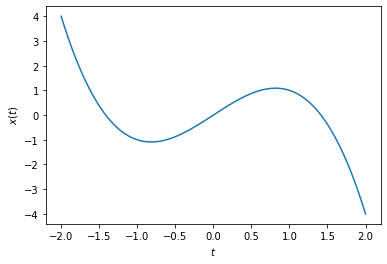

In [92]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

r = 2 # Valor arbitrário

# Define a função 
def model(x, t):
    dxdt = r*x - x**3
    return dxdt

t = np.linspace(-2, 2, 100)
x = r*t - t**3
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.show()

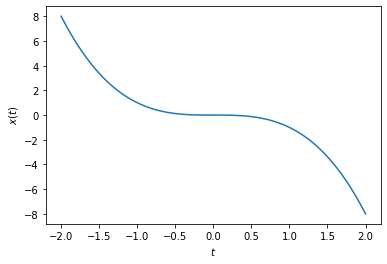

In [93]:
# No caso do r = 0
def x(t, r=0):
    return r*t - t**3

plt.plot(t, x(t))
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.show()

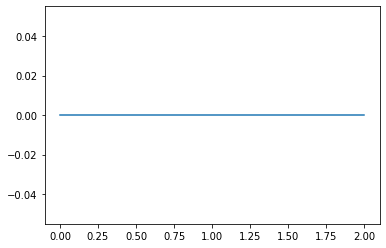

In [94]:
t = np.linspace(0, 2, 100) 
x = odeint(model, 0, t)
plt.plot(t, x)

In [95]:
def SolveRK4(f, ics, end_points):
    from scipy.integrate import RK45
    from math import e

    t0, y0 = ics
    solution = RK45(f, t0, [y0], t_bound=np.inf)
    t_values = []
    y_values = []
    for i in range(end_points):
        solution.step()
        t_values.append(solution.t)
        y_values.append(solution.y[0])
        if solution.status == 'finished':
            break

    plt.plot(y_values)
    plt.xlim([0, end_points])

C:\Users\ROMILDO\AppData\Local\Temp\ipykernel_32860\3893461526.py:2: RuntimeWarning: overflow encountered in power
  return -x**3
C:\Users\ROMILDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)
C:\Users\ROMILDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\rk.py:106: RuntimeWarning: overflow encountered in multiply
  return np.dot(K.T, self.E) * h
C:\Users\ROMILDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\rk.py:63: RuntimeWarning: overflow encountered in multiply
  dy = np.dot(K[:s].T, a[:s]) * h


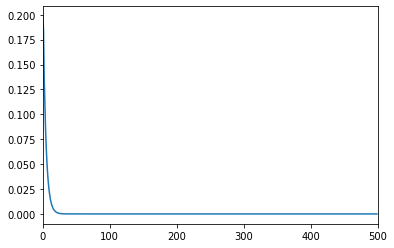

In [96]:
def f(t,x):
    return -x**3

SolveRK4(f, [0, .2], 500)

### Bifurcações


$$\frac{dx}{dt}= c \left( x-\frac{x^3}{3}+A \right) \equiv f(x)$$

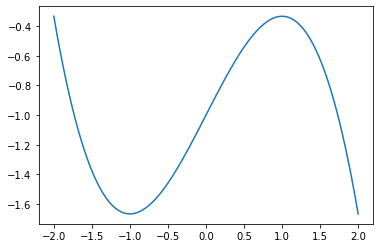

In [97]:
from sympy.abc import A

A = -1
x = np.linspace(-2, 2, 100)
f = lambda x, A: x - ((x**3)/3) + A

plt.plot(x, f(x, A))

Text(0, 0.5, 'x')

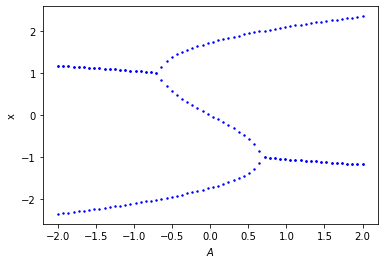

In [98]:
from sympy.abc import X
from sympy import re
from collections import defaultdict

pts = defaultdict(list)
axis = np.linspace(-2, 2, 60)
for v in axis:
    g = f(x, v)
    xvals = solve(X - ((X**3)/3) + v)
    for i in range(len(xvals)): pts[i].append(re(xvals[i]))
for i in range(len(xvals)): plt.scatter(axis, pts[i], color='blue', s=2)

plt.xlabel("$A$")
plt.ylabel("x")

In [99]:
sols = solve(X - ((X**3)/3) + 0.7)
sols

[2.01102985685326,
 -1.00551492842663 - 0.182156015180445*I,
 -1.00551492842663 + 0.182156015180445*I]

### Bi-Estabilidade e Histerese

$$\frac{dx}{dt}=f(x)=r+x^2$$

In [100]:
from sympy.abc import x

f = x**2 + 2
print(f"{f}\t{type(f)}")

x**2 + 2	<class 'sympy.core.add.Add'>


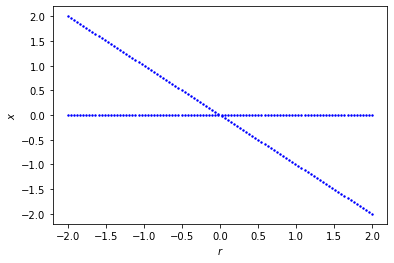

In [101]:
from sympy.abc import r, x
from sympy import re
from collections import defaultdict

def drawbif(func, l, u):
    axis = np.linspace(l, u, 100)
    print()
    pts = defaultdict(list)
    epts = []
    for v in axis:
        g = func.subs(r, v)
        xvals = solve(g, x)
        for i in range(len(xvals)): pts[i].append(re(xvals[i]))
    
    for i in range(len(xvals)): plt.scatter(axis, pts[i], color='blue', marker='o', s=2)

    plt.xlabel("$r$")
    plt.ylabel("$x$")

drawbif(r*x + x**2, -2, 2)
    

### Bifurcação transcrítica


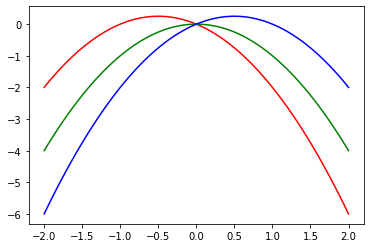

In [102]:
def f(x, r=0):
    return r*x - x**2

x = np.linspace(-2, 2, 100)
plt.plot(x, f(x, r=-1), color='red', label='r=-1')
plt.plot(x, f(x, r=0), color='green', label='r=0')
plt.plot(x, f(x, r=1), color='blue', label='r=1')

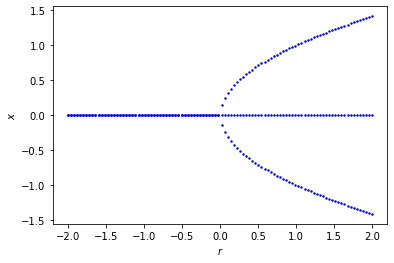

In [103]:
from sympy.abc import x, r

drawbif(r*x - x**3, -2, 2)

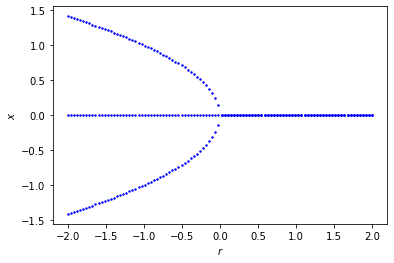

In [104]:
from sympy.abc import x, r

drawbif(r*x + x**3, -2, 2)

### Bifurcação Pitchfork


$$\frac{dx}{dt}= r*x -x^3$$

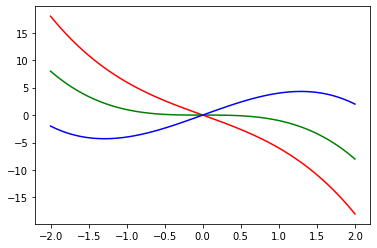

In [105]:
def f(x, r=0):
    return r*x - x**3

x = np.linspace(-2, 2, 100)
plt.plot(x, f(x, r=-5), color='red', label='r=-1')
plt.plot(x, f(x, r=0), color='green', label='r=0')
plt.plot(x, f(x, r=5), color='blue', label='r=1')

### Bifurcação de Hopf

$$\frac{dx}{dt} = -x + ay + x^2 y, $$

$$\frac{dy}{dt} = b - a y - x^2 y$$

In [106]:
from sympy.abc import a, b, x, y 
from sympy import Matrix

# Mudar os valores de a, b aqui

def dx_dt(a=a): return -x * a*y + (x**2)*y
def dy_dt(b=b): return b - a*y - (x**2)*y

In [107]:
matrix = Matrix([dx_dt(), dy_dt()])
matrix

Matrix([
[  -a*x*y + x**2*y],
[-a*y + b - x**2*y]])

In [108]:
J = matrix.jacobian([x, y])
J

Matrix([
[-a*y + 2*x*y, -a*x + x**2],
[      -2*x*y,   -a - x**2]])

In [109]:
J.eigenvals()

{-a*y/2 - a/2 - x**2/2 + x*y - sqrt(a**2*y**2 - 2*a**2*y + a**2 + 6*a*x**2*y + 2*a*x**2 - 4*a*x*y**2 + 4*a*x*y + x**4 - 4*x**3*y + 4*x**2*y**2)/2: 1,
 -a*y/2 - a/2 - x**2/2 + x*y + sqrt(a**2*y**2 - 2*a**2*y + a**2 + 6*a*x**2*y + 2*a*x**2 - 4*a*x*y**2 + 4*a*x*y + x**4 - 4*x**3*y + 4*x**2*y**2)/2: 1}

Para encontrar o equilíbrio pontual do sistema, basta resolver o sistema:

In [110]:
dy_dt()

-a*y + b - x**2*y

In [113]:
from sympy import solve
from sympy.abc import x, y

solve((dx_dt(), dy_dt()), (x, y))

[(0, b/a), (-(a + 1)*(a*b/(a**2 + a) - b)/b, b/(a**2 + a))]

Se nós substituirmos o valores de equilíbrio do sistema na matriz jacobiana:

In [114]:
Jeq = Matrix([dx_dt().subs(x, b), dy_dt().subs(y, b/(b**2+a))])
jacobian_Jeq = Jeq.jacobian([x, y])

Podemos encontrar os autovalores do sistema:

In [115]:
evs = jacobian_Jeq.subs(a, 0.1).eigenvals()
evs

{-1.4142135623731*b*sqrt(-x*(1.0*b - 0.1)/(1.0*b**2 + 0.1)): 1,
 1.4142135623731*b*sqrt(-x*(1.0*b - 0.1)/(1.0*b**2 + 0.1)): 1}

In [140]:
from sympy.abc import symbols

b = symbols('b')

def pol(b=b): return list(evs.items())[0][0].subs(b, b) - 1

In [141]:
from sympy import solve

pol()

-1.4142135623731*b*sqrt(-x*(1.0*b - 0.1)/(1.0*b**2 + 0.1)) - 1